## <center>Multi class classification AUC_ROC curves
### <center>One vs rest ROC strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_iris()

In [3]:
x,y = data.data, data.target

### We have to binirize the target :

In [4]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#### Initializing the classifier

In [6]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(x_train, y_train).decision_function(x_test)

### computing auc and roc for each class:

In [7]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Plotting ROC curve for specific classes

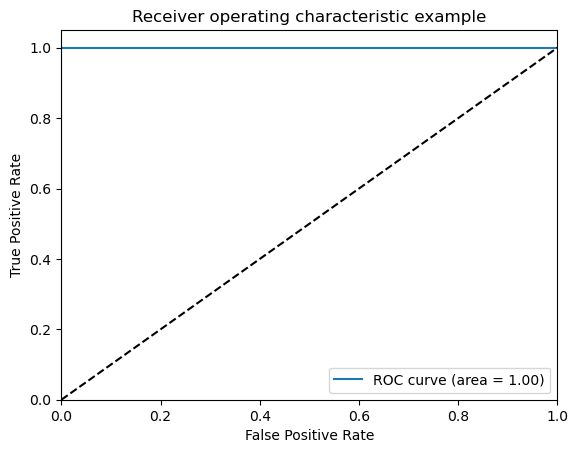

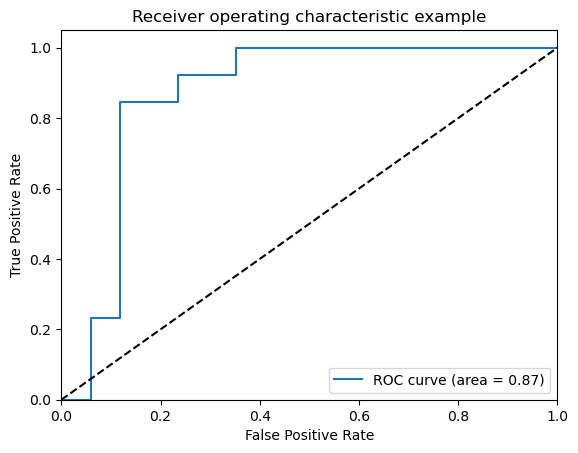

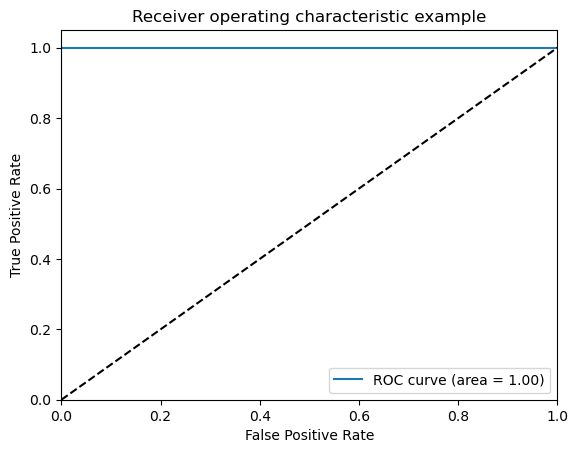

In [8]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label = 'ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Random Forest classifier

#### Random Forest does not have decision_function, you can use predict_proba using random forest

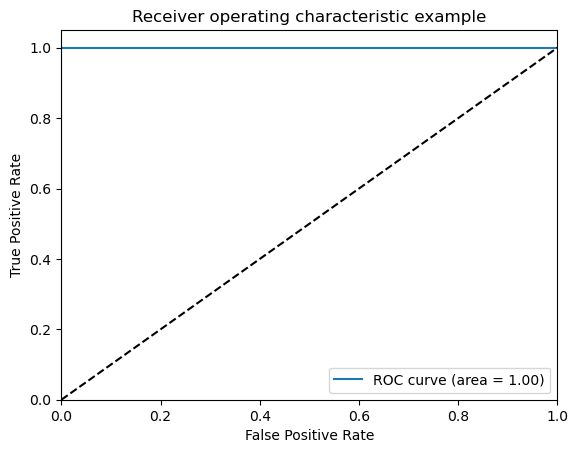

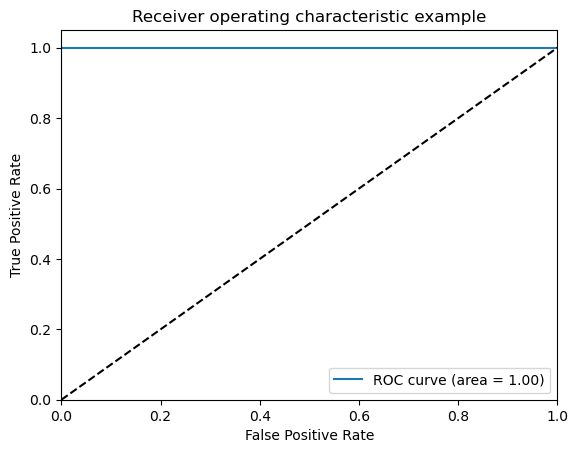

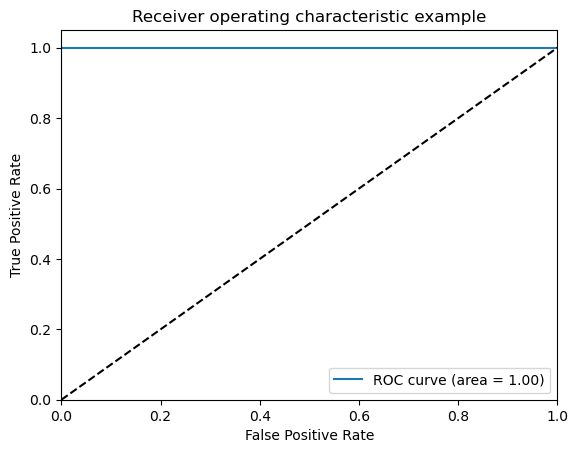

In [9]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = clf.fit(x_train, y_train).predict_proba(x_test)

### computing auc and roc for each class:

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Plotting ROC curve for specific classes

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label = 'ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Alternative method :maybe a little more succinct.

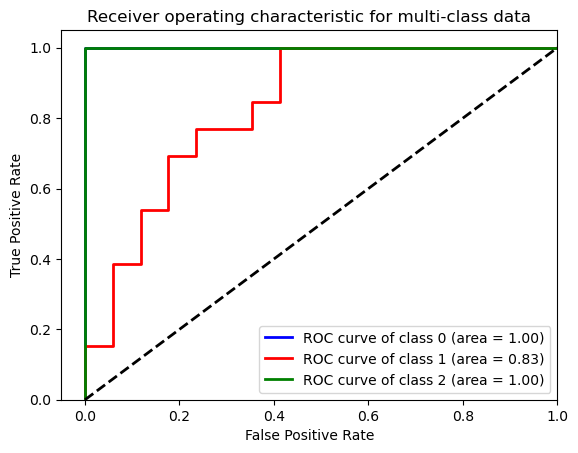

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Using Random forest classifier 

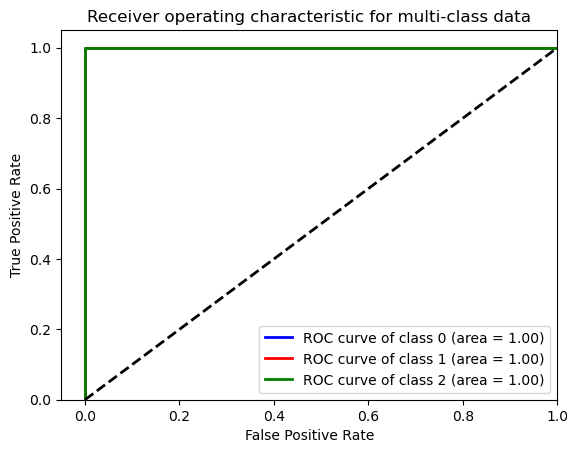

In [11]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()